In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

esg_data = pd.read_csv('esg_data.csv')

In [4]:
esg_data

,CompanyName,Industry,Sector,Year,Access_And_Affordability,Air_Quality,Business_Ethics,Business_Model_Resilience,Competitive_Behavior,Critical_Incident_Risk_Management,...,Product_Quality_And_Safety,Selling_Practices_And_Product_Labeling,Supply_Chain_Management,Systemic_Risk_Management,Waste_And_Hazardous_Materials_Management,Water_And_Wastewater_Management,E_Score,S_Score,G_Score,ESG_Score
0,Amgen Inc.,Drug Manufacturers - Major,Healthcare,2020,0.54,0.66,0.77,0.40,0.31,0.61,...,0.56,0.47,0.24,0.51,0.91,0.95,5.66,3.96,5.96,15.58
1,Amgen Inc.,Drug Manufacturers - Major,Healthcare,2021,0.55,0.92,0.69,0.42,0.27,0.59,...,0.67,0.42,0.22,0.49,0.76,0.81,5.50,3.54,5.39,14.43
2,Amgen Inc.,Drug Manufacturers - Major,Healthcare,2022,0.54,0.47,0.70,0.40,0.30,0.57,...,0.69,0.37,0.32,0.47,0.91,0.88,5.83,3.32,5.44,14.59
3,AstraZeneca plc,Drug Manufacturers - Major,Healthcare,2020,0.51,0.81,0.84,0.47,0.27,0.67,...,0.46,0.51,0.79,0.45,0.92,0.92,6.08,4.04,6.01,16.13
4,AstraZeneca plc,Drug Manufacturers - Major,Healthcare,2021,0.57,0.58,0.82,0.42,0.24,0.59,...,0.44,0.54,0.77,0.45,0.87,0.84,6.05,4.05,5.44,15.54
5,AstraZeneca plc,Drug Manufacturers - Major,Healthcare,2022,0.56,0.79,0.80,0.43,0.27,0.20,...,0.53,0.27,0.78,0.43,0.89,0.85,6.23,4.11,5.12,15.46
6,"Avanos Medical, Inc.",Medical Appliances & Equipment,Healthcare,2020,0.47,0.00,0.65,0.33,0.32,0.80,...,0.63,0.65,0.74,0.39,0.90,0.77,4.54,4.23,5.59,14.36
7,"Avanos Medical, Inc.",Medical Appliances & Equipment,Healthcare,2021,0.44,0.00,0.68,0.30,0.39,0.74,...,0.64,0.65,0.75,0.39,0.91,0.73,4.98,4.17,5.76,14.91
8,"Avanos Medical, Inc.",Medical Appliances & Equipment,Healthcare,2022,0.44,0.00,0.72,0.39,0.34,0.86,...,0.64,0.65,0.75,0.34,0.85,0.85,3.83,4.07,5.89,13.79
9,Bayer AG,Drug Manufacturers - Major,Healthcare,2020,0.55,0.73,0.66,0.37,0.36,0.73,...,0.63,0.56,0.70,0.55,0.32,0.91,5.46,3.82,6.05,15.33


#  Sector Analysis

In [5]:
healthcare_data

,CompanyName,Industry,Sector,Year,Access_And_Affordability,Air_Quality,Business_Ethics,Business_Model_Resilience,Competitive_Behavior,Critical_Incident_Risk_Management,...,Product_Quality_And_Safety,Selling_Practices_And_Product_Labeling,Supply_Chain_Management,Systemic_Risk_Management,Waste_And_Hazardous_Materials_Management,Water_And_Wastewater_Management,E_Score,S_Score,G_Score,ESG_Score
0,Amgen Inc.,Drug Manufacturers - Major,Healthcare,2020,0.54,0.66,0.77,0.40,0.31,0.61,...,0.56,0.47,0.24,0.51,0.91,0.95,5.66,3.96,5.96,15.58
1,Amgen Inc.,Drug Manufacturers - Major,Healthcare,2021,0.55,0.92,0.69,0.42,0.27,0.59,...,0.67,0.42,0.22,0.49,0.76,0.81,5.50,3.54,5.39,14.43
2,Amgen Inc.,Drug Manufacturers - Major,Healthcare,2022,0.54,0.47,0.70,0.40,0.30,0.57,...,0.69,0.37,0.32,0.47,0.91,0.88,5.83,3.32,5.44,14.59
3,AstraZeneca plc,Drug Manufacturers - Major,Healthcare,2020,0.51,0.81,0.84,0.47,0.27,0.67,...,0.46,0.51,0.79,0.45,0.92,0.92,6.08,4.04,6.01,16.13
4,AstraZeneca plc,Drug Manufacturers - Major,Healthcare,2021,0.57,0.58,0.82,0.42,0.24,0.59,...,0.44,0.54,0.77,0.45,0.87,0.84,6.05,4.05,5.44,15.54
5,AstraZeneca plc,Drug Manufacturers - Major,Healthcare,2022,0.56,0.79,0.80,0.43,0.27,0.20,...,0.53,0.27,0.78,0.43,0.89,0.85,6.23,4.11,5.12,15.46
6,"Avanos Medical, Inc.",Medical Appliances & Equipment,Healthcare,2020,0.47,0.00,0.65,0.33,0.32,0.80,...,0.63,0.65,0.74,0.39,0.90,0.77,4.54,4.23,5.59,14.36
7,"Avanos Medical, Inc.",Medical Appliances & Equipment,Healthcare,2021,0.44,0.00,0.68,0.30,0.39,0.74,...,0.64,0.65,0.75,0.39,0.91,0.73,4.98,4.17,5.76,14.91
8,"Avanos Medical, Inc.",Medical Appliances & Equipment,Healthcare,2022,0.44,0.00,0.72,0.39,0.34,0.86,...,0.64,0.65,0.75,0.34,0.85,0.85,3.83,4.07,5.89,13.79
9,Bayer AG,Drug Manufacturers - Major,Healthcare,2020,0.55,0.73,0.66,0.37,0.36,0.73,...,0.63,0.56,0.70,0.55,0.32,0.91,5.46,3.82,6.05,15.33


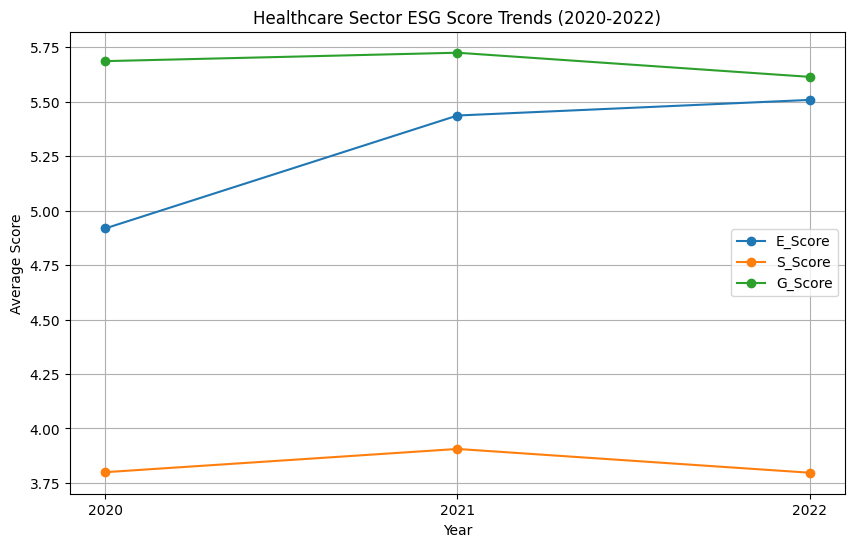

In [5]:
esg_scores = ['E_Score', 'S_Score', 'G_Score']
healthcare_data = esg_data[esg_data['Sector'] == 'Healthcare']

# Calculate avg ESG Score
yearly_trends = healthcare_data[healthcare_data['Year'].isin([2020, 2021, 2022])].groupby('Year')[esg_scores].mean()

# Ploting
plt.figure(figsize=(10, 6))

for score in esg_scores:
    plt.plot(yearly_trends.index, yearly_trends[score], marker='o', label=score)

# Plot Setting
plt.title('Healthcare Sector ESG Score Trends (2020-2022)')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks([2020, 2021, 2022])
plt.legend()
plt.grid(True)

plt.show()

## GHG_Emission, Materials_Management Trend

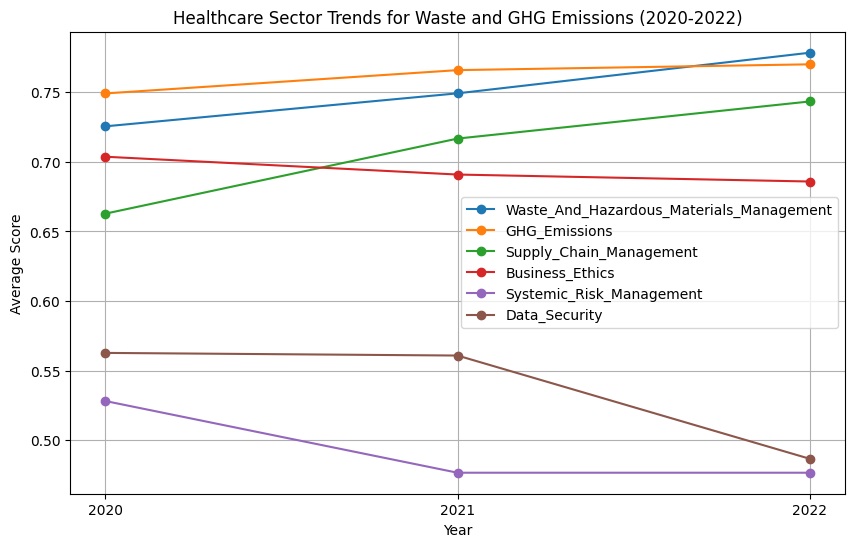

In [7]:
indicators = ['Waste_And_Hazardous_Materials_Management', 'GHG_Emissions', 'Supply_Chain_Management','Business_Ethics', 'Systemic_Risk_Management','Data_Security']

# filter Healthcare Sector's data
healthcare_data = esg_data[esg_data['Sector'] == 'Healthcare']

# Calculate indicators yearly avg Score
yearly_trends = healthcare_data[healthcare_data['Year'].isin([2020, 2021, 2022])].groupby('Year')[indicators].mean()

# Setting
plt.figure(figsize=(10, 6))
for indicator in indicators:
    plt.plot(yearly_trends.index, yearly_trends[indicator], marker='o', label=indicator)

plt.title('Healthcare Sector Trends for Waste and GHG Emissions (2020-2022)')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks([2020, 2021, 2022]) 
plt.legend()
plt.grid(True)


plt.show()

## Sector strengths and weakness

In [12]:
# 要排除的列
excluded_columns = ['E_Score', 'S_Score', 'G_Score', 'ESG_Score']

# 筛选 2020, 2021 和 2022 年的数据，排除指定列
filtered_data = healthcare_data[healthcare_data['Year'].isin([2020, 2021, 2022])].drop(columns=excluded_columns)

# 检查是否有非数值列并删除它们，确保只计算数值列的平均值
numeric_data = filtered_data.select_dtypes(include='number')

# 计算各列的平均值，忽略缺失值
labels_avg = numeric_data.mean()

# 对平均分进行排序，找到前 5 个和后 5 个标签
top_5_labels = labels_avg.sort_values(ascending=False).head(5)
last_5_labels = labels_avg.sort_values(ascending=True).head(5)

# 输出结果
print("Top 5 Labels:")
print(top_5_labels)

print("\nLast 5 Labels:")
print(last_5_labels)

Top 5 Labels:
Year                                           2021.028571
Water_And_Wastewater_Management                   0.832286
GHG_Emissions                                     0.762000
Waste_And_Hazardous_Materials_Management          0.751714
Employee_Engagement_Inclusion_And_Diversity       0.724000
dtype: float64

Last 5 Labels:
Customer_Welfare                          0.252000
Competitive_Behavior                      0.268857
Customer_Privacy                          0.390571
Business_Model_Resilience                 0.415143
Selling_Practices_And_Product_Labeling    0.418571
dtype: float64


# Sector VS Industry

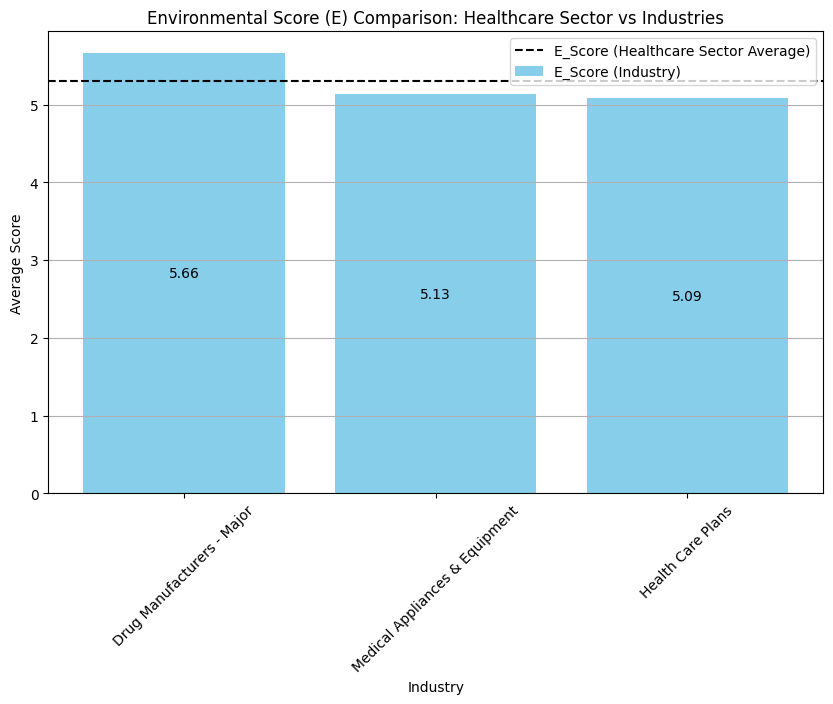

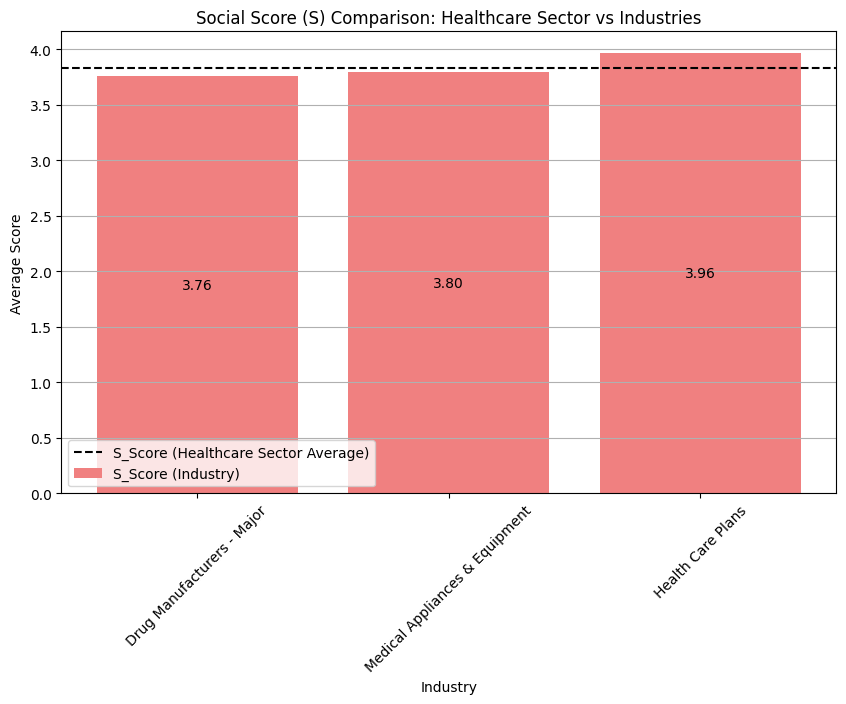

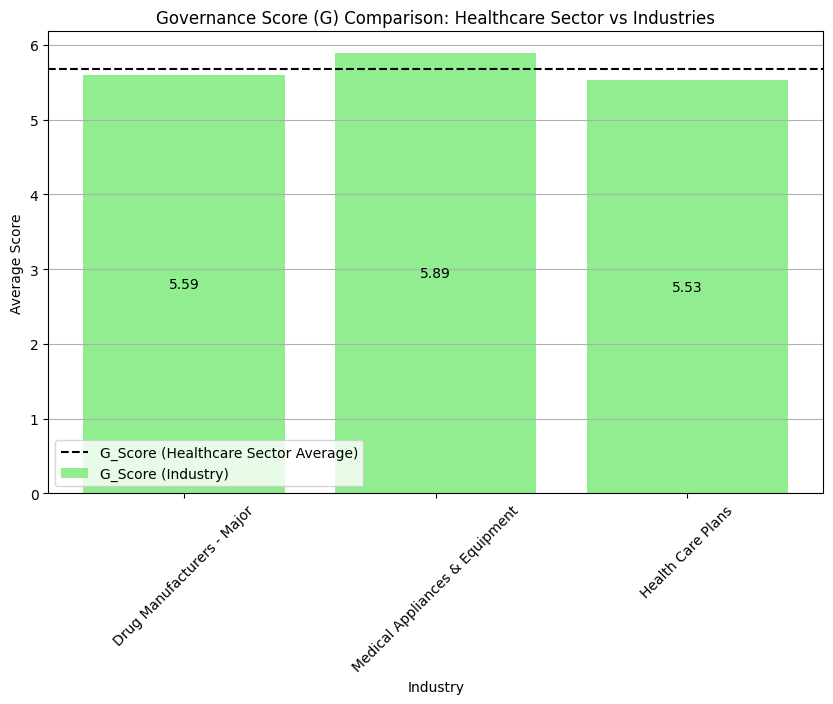

In [13]:
# Calculate the average score for the Healthcare sector
healthcare_sector_avg = esg_data[esg_data['Sector'] == 'Healthcare'].mean(numeric_only=True)

# Get all industries within the Healthcare sector and calculate the average score for each industry
healthcare_industries = esg_data[esg_data['Sector'] == 'Healthcare']['Industry'].unique()
industry_avg_scores = {industry: esg_data[(esg_data['Sector'] == 'Healthcare') & (esg_data['Industry'] == industry)].mean(numeric_only=True) for industry in healthcare_industries}

# Select the columns for ESG dimension scores
esg_scores = ['E_Score', 'S_Score', 'G_Score']
colors = ['skyblue', 'lightcoral', 'lightgreen']
titles = ['Environmental Score (E)', 'Social Score (S)', 'Governance Score (G)']

# Plot three separate charts
for i, score in enumerate(esg_scores):
    plt.figure(figsize=(10, 6))
    
    # Get the average score for each industry in the current dimension
    industry_scores = [industry_avg_scores[industry][score] for industry in healthcare_industries]
    
    # Plot the bar chart
    bars = plt.bar(healthcare_industries, industry_scores, color=colors[i], label=f'{score} (Industry)')
    
    # Add the average score as text in the middle of each bar
    for bar, industry_score in zip(bars, industry_scores):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, 
                 f'{industry_score:.2f}', ha='center', va='center', color='black')
    
    # Plot the Healthcare sector average as a horizontal line
    plt.axhline(y=healthcare_sector_avg[score], color='black', linestyle='--', linewidth=1.5, label=f'{score} (Healthcare Sector Average)')
    
    # Set the chart title and labels
    plt.title(f'{titles[i]} Comparison: Healthcare Sector vs Industries')
    plt.xlabel('Industry')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()


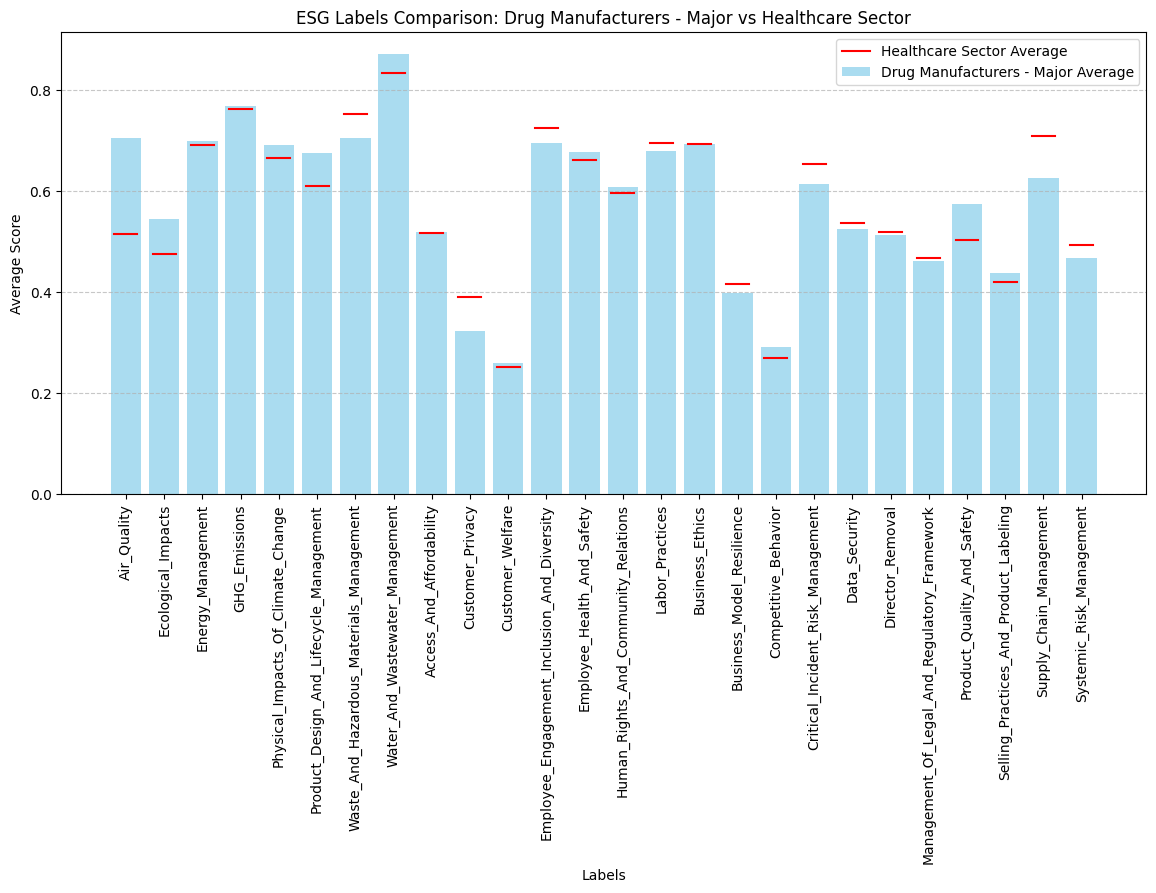

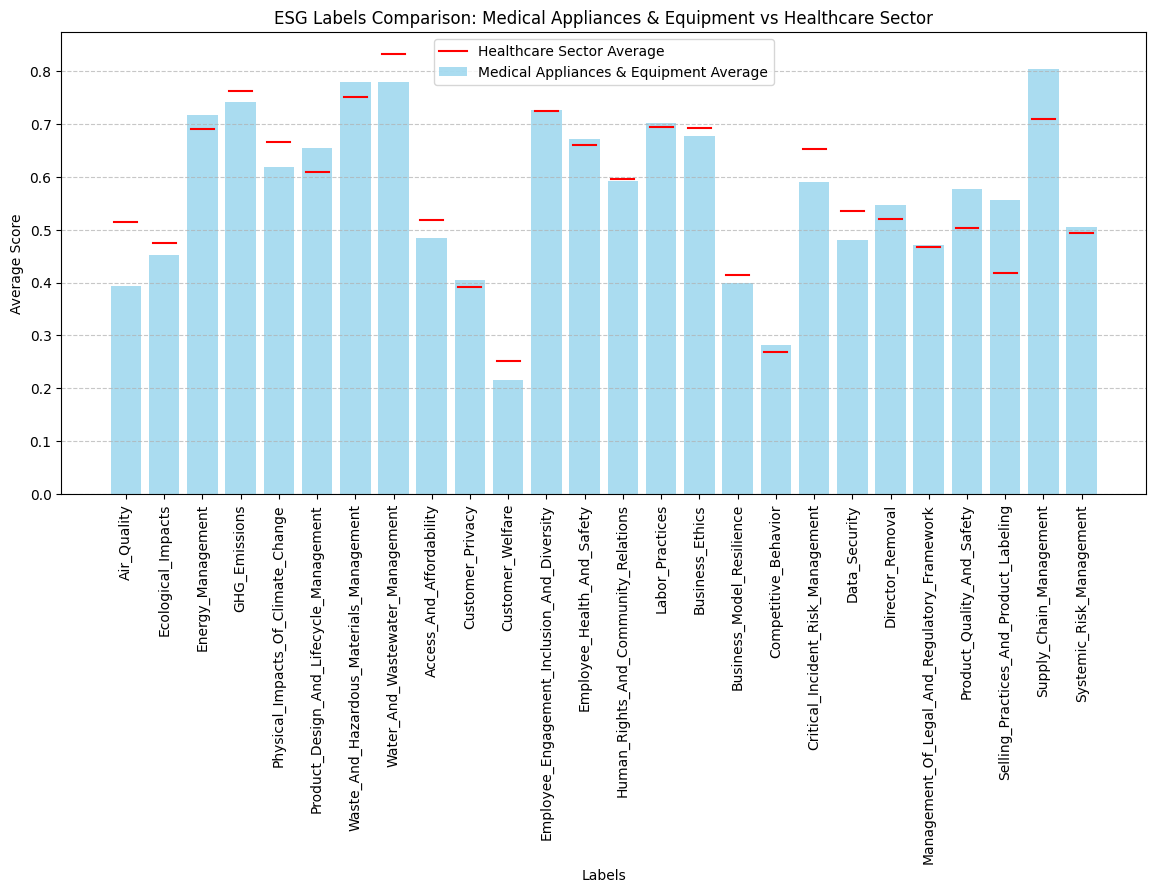

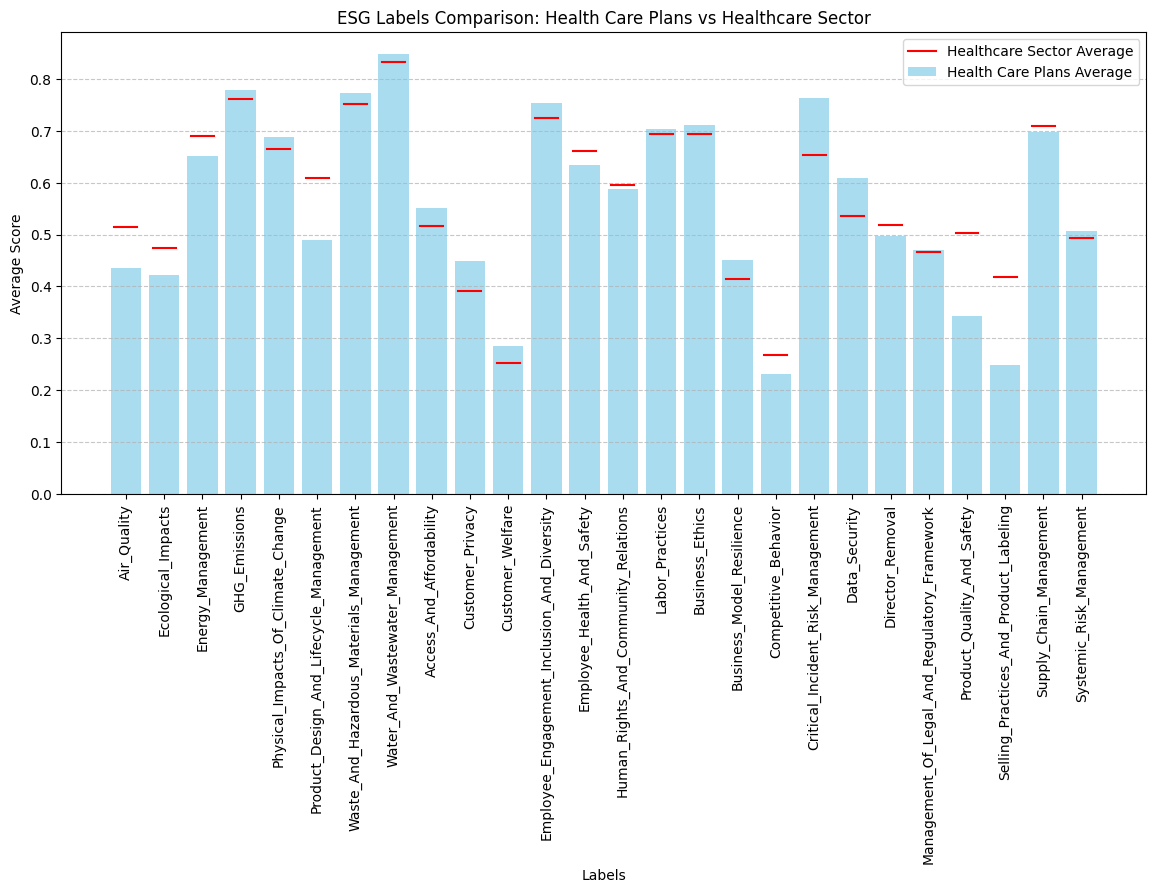

In [14]:

environmental_labels = ['Air_Quality', 'Ecological_Impacts', 'Energy_Management', 'GHG_Emissions',
                        'Physical_Impacts_Of_Climate_Change', 'Product_Design_And_Lifecycle_Management',
                        'Waste_And_Hazardous_Materials_Management', 'Water_And_Wastewater_Management']
social_labels = ['Access_And_Affordability', 'Customer_Privacy', 'Customer_Welfare',
                 'Employee_Engagement_Inclusion_And_Diversity', 'Employee_Health_And_Safety',
                 'Human_Rights_And_Community_Relations', 'Labor_Practices']
governance_labels = ['Business_Ethics', 'Business_Model_Resilience', 'Competitive_Behavior',
                     'Critical_Incident_Risk_Management', 'Data_Security', 'Director_Removal',
                     'Management_Of_Legal_And_Regulatory_Framework', 'Product_Quality_And_Safety',
                     'Selling_Practices_And_Product_Labeling', 'Supply_Chain_Management', 'Systemic_Risk_Management']

# get Healthcare Sector  Industries and calculate Industry avg score
healthcare_industries = esg_data[esg_data['Sector'] == 'Healthcare']['Industry'].unique()
industry_avg_scores = {industry: esg_data[(esg_data['Sector'] == 'Healthcare') & (esg_data['Industry'] == industry)].mean(numeric_only=True) for industry in healthcare_industries}

# Healthcare Sector avg score
healthcare_sector_avg = esg_data[esg_data['Sector'] == 'Healthcare'].mean(numeric_only=True)

all_labels = environmental_labels + social_labels + governance_labels

# ploting
for industry in healthcare_industries:
    plt.figure(figsize=(14, 6))
    
    # industry_scores
    industry_scores = [industry_avg_scores[industry][label] for label in all_labels]
    
    # sector avg score
    sector_avg_scores = [healthcare_sector_avg[label] for label in all_labels]
    
    # 绘制该子行业的柱状图
    x = range(len(all_labels))
    plt.bar(x, industry_scores, color='skyblue', alpha=0.7, label=f'{industry} Average')
    
    # Red bar for Healthcare Sector avg score
    for j, avg_score in enumerate(sector_avg_scores):
        plt.plot([j - 0.3, j + 0.3], [avg_score, avg_score], color='red', linestyle='-', linewidth=1.5, label='Healthcare Sector Average' if j == 0 else "")
    
    # Setting
    plt.title(f'ESG Labels Comparison: {industry} vs Healthcare Sector')
    plt.xlabel('Labels')
    plt.ylabel('Average Score')
    plt.xticks(ticks=x, labels=all_labels, rotation='vertical')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

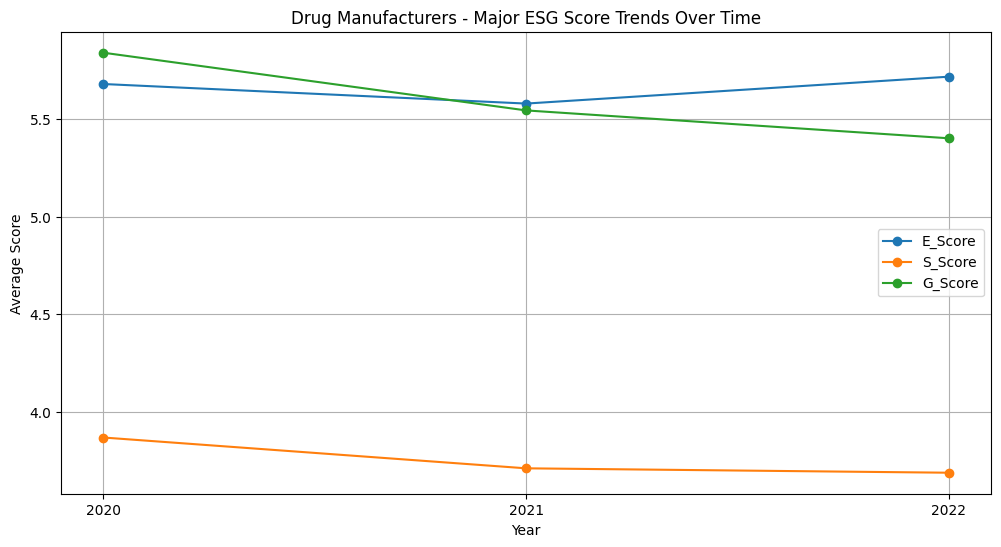

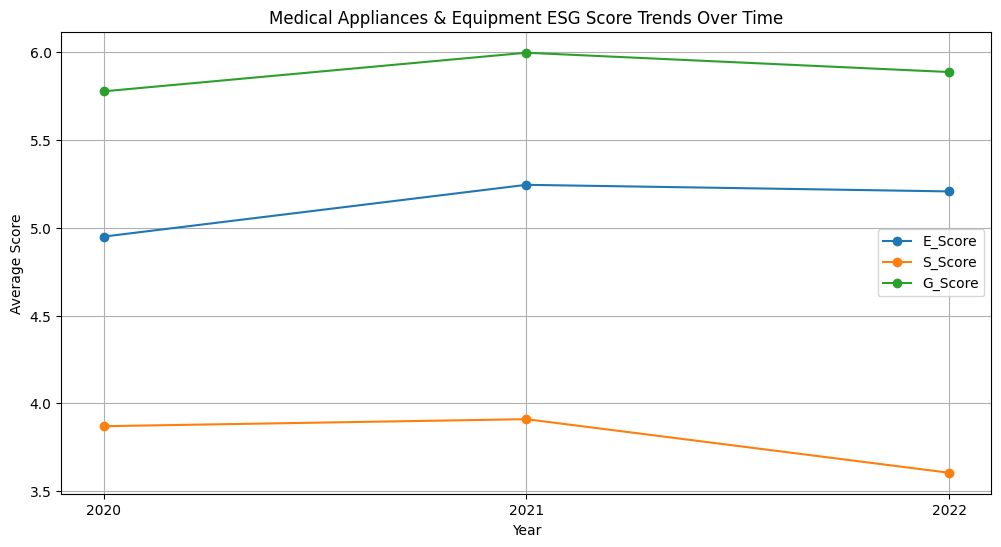

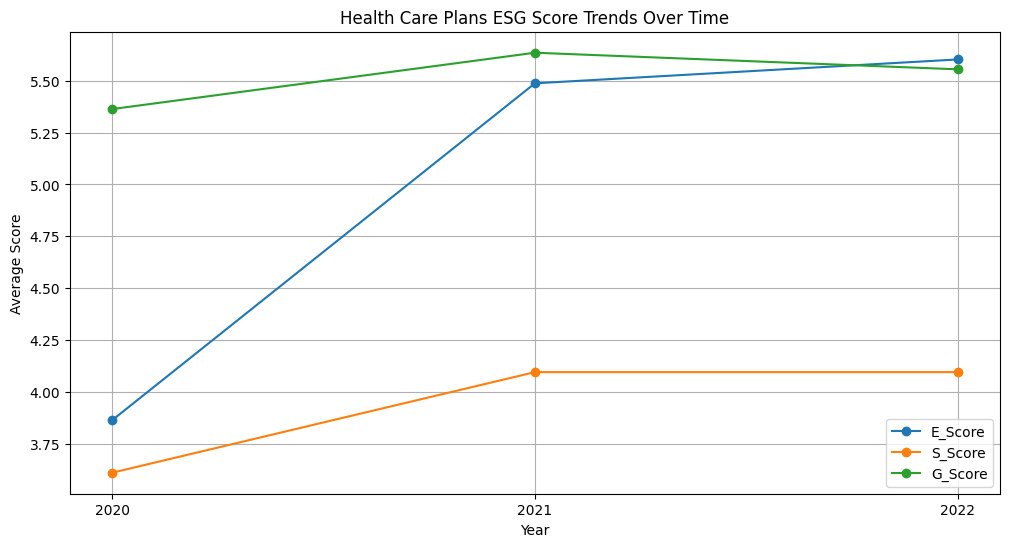

In [15]:
esg_scores = ['E_Score', 'S_Score', 'G_Score']

# get all industries in Healthcare Sector
healthcare_industries = esg_data[esg_data['Sector'] == 'Healthcare']['Industry'].unique()

# calculate yearly ESG avg score
for industry in healthcare_industries:
    # filter Industry data
    industry_data = esg_data[(esg_data['Sector'] == 'Healthcare') & (esg_data['Industry'] == industry)]
    
    #  E, S, G avg score
    yearly_trends = industry_data.groupby('Year')[esg_scores].mean()
    
    # Ploting
    plt.figure(figsize=(12, 6))
    
    for score in esg_scores:
        plt.plot(yearly_trends.index, yearly_trends[score], marker='o', label=score)
    
    # Setting
    plt.title(f'{industry} ESG Score Trends Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average Score')
    plt.xticks([2020, 2021, 2022])
    plt.legend()
    plt.grid(True)
    plt.show()

# Correlation Analysis Between ESG Scores and Financial Data

In [16]:
financial_data = pd.read_csv('company_financial.csv')
financial_data

,CompanyName,Industry,Sector,Year,AnnualEarning_Billion,MarketCap_Billion,Revenue,Expenses
0,Johnson & Johnson,Drug Manufacturers - Major,Healthcare,2022,15.83,461.84,85.16,69.33
1,Johnson & Johnson,Drug Manufacturers - Major,Healthcare,2021,21.35,450.35,91.15,69.80
2,Johnson & Johnson,Drug Manufacturers - Major,Healthcare,2020,22.96,414.30,93.78,70.82
3,Boston Scientific Corporation,Medical Appliances & Equipment,Healthcare,2022,1.99,84.69,14.24,12.25
4,Boston Scientific Corporation,Medical Appliances & Equipment,Healthcare,2021,1.14,66.27,12.68,11.54
5,Boston Scientific Corporation,Medical Appliances & Equipment,Healthcare,2020,1.08,60.53,11.89,10.81
6,UnitedHealth Group Inc.,Health Care Plans,Healthcare,2022,29.11,495.37,367.53,338.42
7,UnitedHealth Group Inc.,Health Care Plans,Healthcare,2021,26.34,472.94,322.13,295.79
8,UnitedHealth Group Inc.,Health Care Plans,Healthcare,2020,22.31,332.73,285.27,262.96


In [17]:
esg_data_filtered = esg_data[['CompanyName', 'Year', 'E_Score', 'S_Score', 'G_Score','ESG_Score']]
merged_data = pd.merge(financial_data, esg_data_filtered, on=['CompanyName', 'Year'])
merged_data

,CompanyName,Industry,Sector,Year,AnnualEarning_Billion,MarketCap_Billion,Revenue,Expenses,E_Score,S_Score,G_Score,ESG_Score
0,Johnson & Johnson,Drug Manufacturers - Major,Healthcare,2022,15.83,461.84,85.16,69.33,5.26,3.63,5.20,14.09
1,Johnson & Johnson,Drug Manufacturers - Major,Healthcare,2021,21.35,450.35,91.15,69.80,5.35,3.56,5.41,14.32
2,Johnson & Johnson,Drug Manufacturers - Major,Healthcare,2020,22.96,414.30,93.78,70.82,5.51,3.66,5.33,14.50
3,Boston Scientific Corporation,Medical Appliances & Equipment,Healthcare,2022,1.99,84.69,14.24,12.25,5.88,3.70,6.12,15.70
4,Boston Scientific Corporation,Medical Appliances & Equipment,Healthcare,2021,1.14,66.27,12.68,11.54,5.75,4.12,6.32,16.19
5,Boston Scientific Corporation,Medical Appliances & Equipment,Healthcare,2020,1.08,60.53,11.89,10.81,6.01,4.01,5.84,15.86
6,UnitedHealth Group Inc.,Health Care Plans,Healthcare,2022,29.11,495.37,367.53,338.42,5.75,4.00,5.53,15.28
7,UnitedHealth Group Inc.,Health Care Plans,Healthcare,2021,26.34,472.94,322.13,295.79,5.58,4.14,6.24,15.96
8,UnitedHealth Group Inc.,Health Care Plans,Healthcare,2020,22.31,332.73,285.27,262.96,4.11,4.01,5.94,14.06


## ESG VS Company Earning


Processing data for Johnson & Johnson:



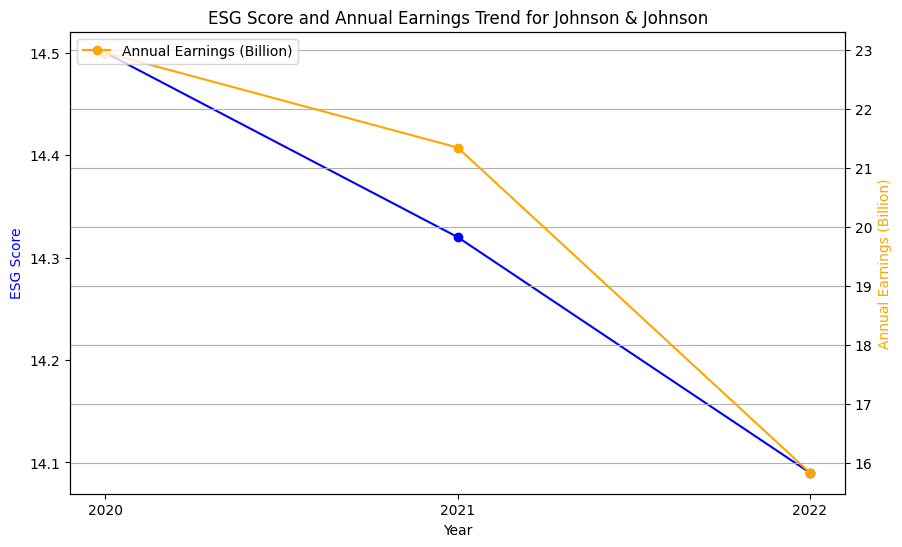

Correlation between ESG Score and Annual Earnings for Johnson & Johnson: 0.9722029674898697

Processing data for Boston Scientific Corporation:



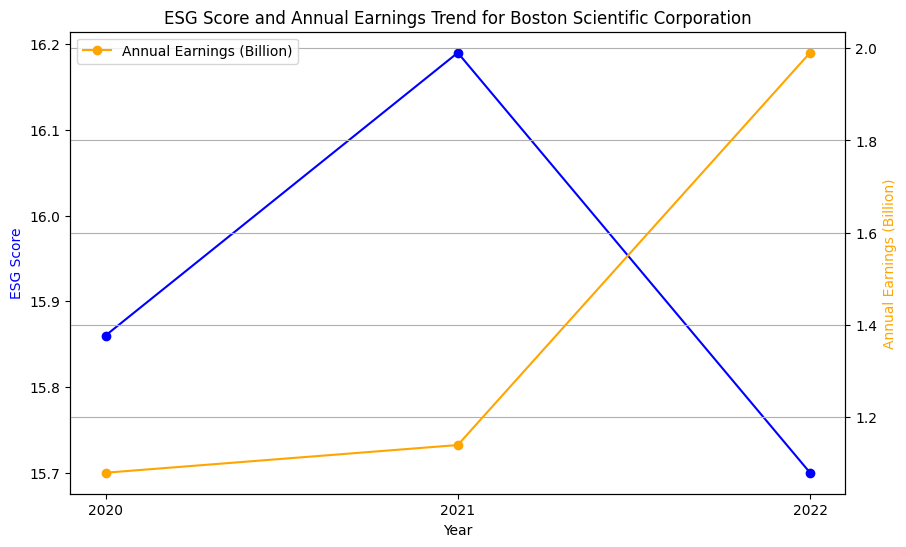

Correlation between ESG Score and Annual Earnings for Boston Scientific Corporation: -0.710726102076593

Processing data for UnitedHealth Group Inc.:



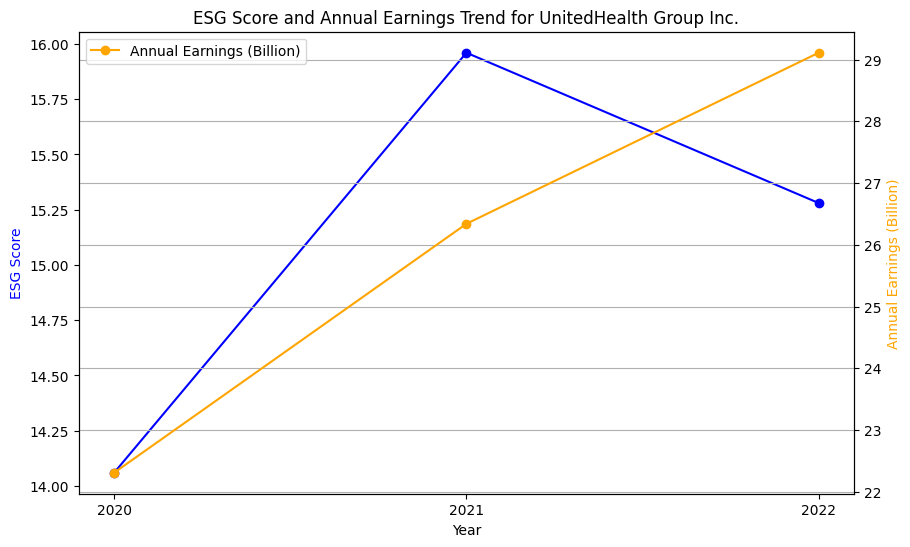

Correlation between ESG Score and Annual Earnings for UnitedHealth Group Inc.: 0.7123301704833972


In [18]:
companies = ["Johnson & Johnson", "Boston Scientific Corporation", "UnitedHealth Group Inc."]
for company_name in companies:
    print(f"\nProcessing data for {company_name}:\n")
    
    # get ESG finance data of each company
    esg_data_filtered = esg_data[(esg_data['CompanyName'] == company_name)][['CompanyName', 'Year', 'ESG_Score']]
    financial_data_filtered = financial_data[financial_data['CompanyName'] == company_name]
    merged_data = pd.merge(financial_data_filtered, esg_data_filtered, on=['CompanyName', 'Year'])
    

    # ploting
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['Year'], merged_data['ESG_Score'], marker='o', color='blue', label='ESG Score')
    plt.ylabel('ESG Score', color='blue')
    plt.xlabel('Year')
    plt.twinx()  
    plt.plot(merged_data['Year'], merged_data['AnnualEarning_Billion'], marker='o', color='orange', label='Annual Earnings (Billion)')
    plt.ylabel('Annual Earnings (Billion)', color='orange')
    plt.title(f'ESG Score and Annual Earnings Trend for {company_name}')
    plt.legend(loc='upper left')
    plt.xticks([2020, 2021, 2022])
    plt.grid(True)
    plt.show()
    
    correlation = merged_data['ESG_Score'].corr(merged_data['AnnualEarning_Billion'])
    print(f"Correlation between ESG Score and Annual Earnings for {company_name}: {correlation}")

## ESG VS Company Market Cap

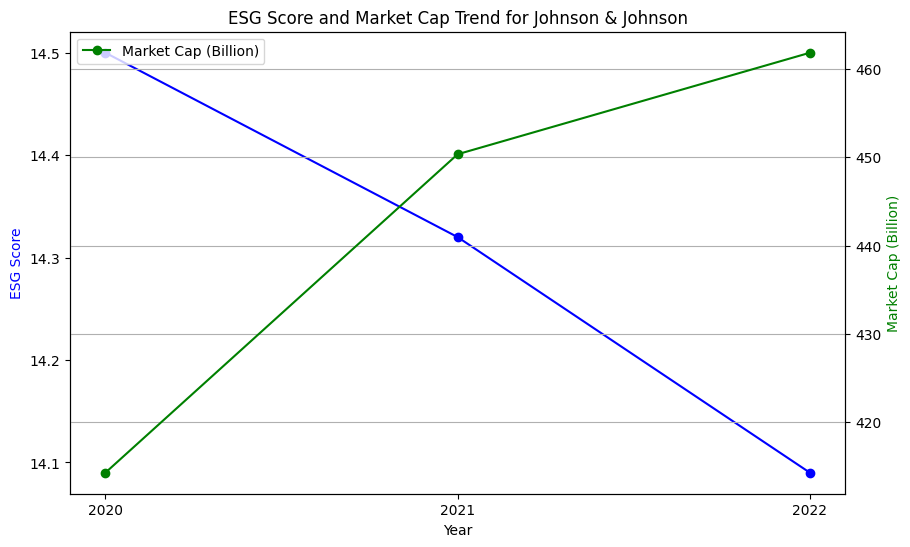

Correlation between ESG Score and Annual Earnings for Johnson & Johnson: 0.9609815759825587


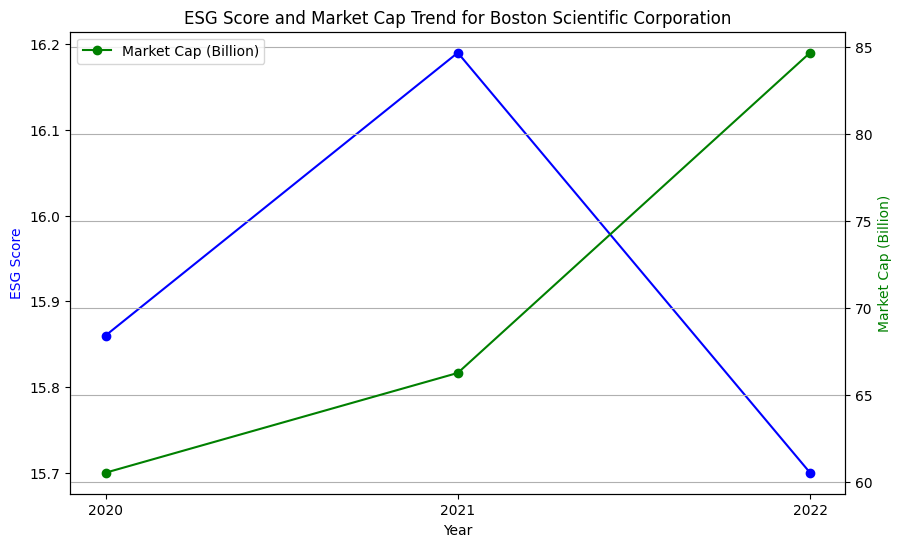

Correlation between ESG Score and Annual Earnings for Boston Scientific Corporation: -0.31256410926488604


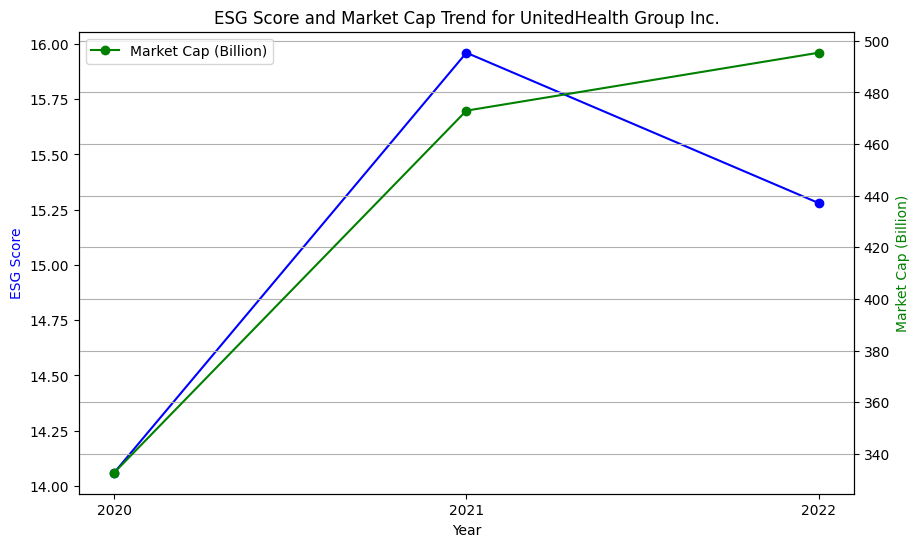

Correlation between ESG Score and Annual Earnings for UnitedHealth Group Inc.: 0.5740127038579924


In [19]:

companies = ["Johnson & Johnson", "Boston Scientific Corporation", "UnitedHealth Group Inc."]

for company_name in companies:
    # get ESG finance data of each company
    esg_data_filtered = esg_data[(esg_data['CompanyName'] == company_name)][['CompanyName', 'Year', 'ESG_Score']]
    financial_data_filtered = financial_data[financial_data['CompanyName'] == company_name]
    merged_data = pd.merge(financial_data_filtered, esg_data_filtered, on=['CompanyName', 'Year'])

    # Ploting
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['Year'], merged_data['ESG_Score'], marker='o', color='blue', label='ESG Score')
    plt.ylabel('ESG Score', color='blue')
    plt.xlabel('Year')
    plt.twinx()  
    plt.plot(merged_data['Year'], merged_data['MarketCap_Billion'], marker='o', color='green', label='Market Cap (Billion)')
    plt.ylabel('Market Cap (Billion)', color='green')
    plt.title(f'ESG Score and Market Cap Trend for {company_name}')
    plt.legend(loc='upper left')
    plt.xticks([2020, 2021, 2022])
    plt.grid(True)
    plt.show()
    # correlation anaysis
    correlation = merged_data['ESG_Score'].corr(merged_data['Expenses'])
    print(f"Correlation between ESG Score and Annual Earnings for {company_name}: {correlation}")



Processing data for Johnson & Johnson:



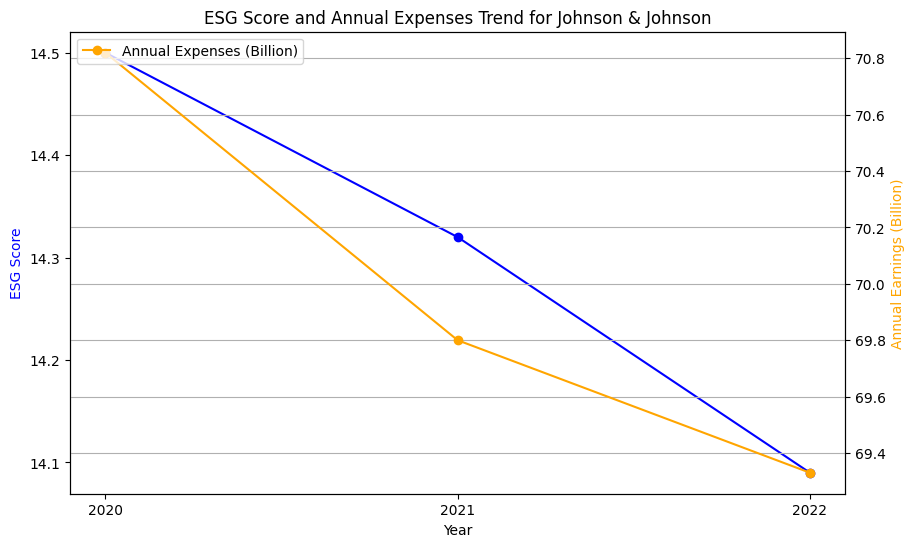

Correlation between ESG Score and Annual Earnings for Johnson & Johnson: 0.9609815759825587

Processing data for Boston Scientific Corporation:



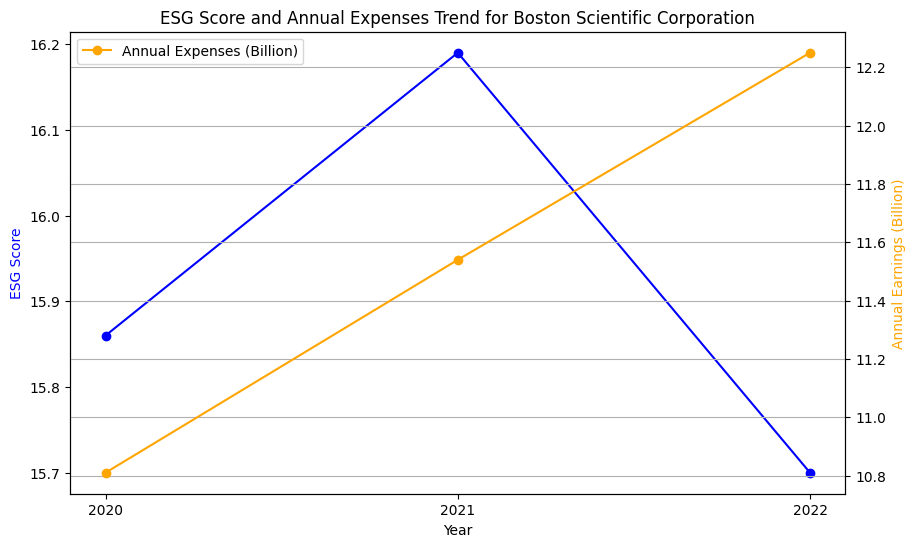

Correlation between ESG Score and Annual Earnings for Boston Scientific Corporation: -0.31256410926488604

Processing data for UnitedHealth Group Inc.:



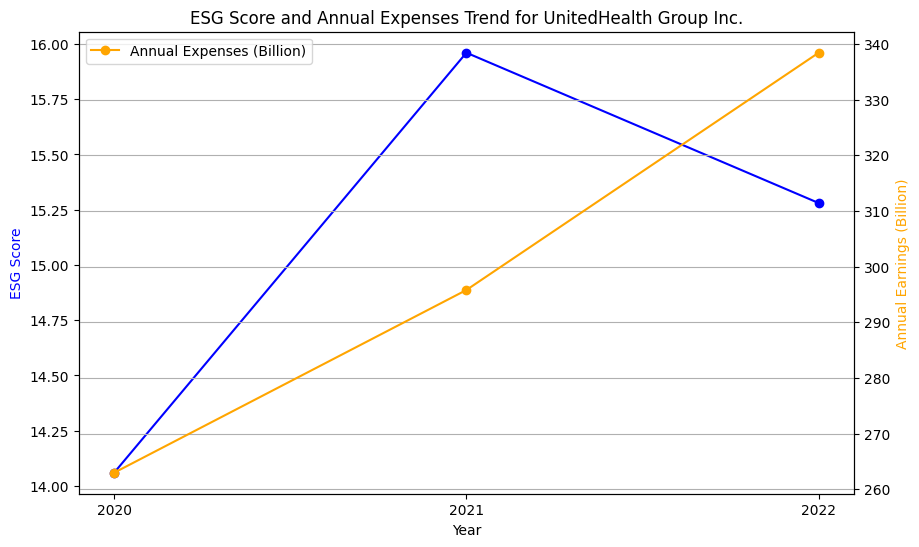

Correlation between ESG Score and Annual Earnings for UnitedHealth Group Inc.: 0.5740127038579924


In [20]:
companies = ["Johnson & Johnson", "Boston Scientific Corporation", "UnitedHealth Group Inc."]
for company_name in companies:
    print(f"\nProcessing data for {company_name}:\n")
    
    esg_data_filtered = esg_data[(esg_data['CompanyName'] == company_name)][['CompanyName', 'Year', 'ESG_Score']]
    financial_data_filtered = financial_data[financial_data['CompanyName'] == company_name]
    merged_data = pd.merge(financial_data_filtered, esg_data_filtered, on=['CompanyName', 'Year'])
    

    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['Year'], merged_data['ESG_Score'], marker='o', color='blue', label='ESG Score')
    plt.ylabel('ESG Score', color='blue')
    plt.xlabel('Year')
    plt.twinx() 
    plt.plot(merged_data['Year'], merged_data['Expenses'], marker='o', color='orange', label='Annual Expenses (Billion)')
    plt.ylabel('Annual Earnings (Billion)', color='orange')
    plt.title(f'ESG Score and Annual Expenses Trend for {company_name}')
    plt.legend(loc='upper left')
    plt.xticks([2020, 2021, 2022])
    plt.grid(True)
    plt.show()
    
    correlation = merged_data['ESG_Score'].corr(merged_data['Expenses'])
    print(f"Correlation between ESG Score and Annual Earnings for {company_name}: {correlation}")